<a href="https://www.kaggle.com/code/eavprog/abscur-sharp?scriptVersionId=115366702" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Рейтинг валют по абсолютным курсам и коэффициенту Шарпа 

In [1]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt


import abscur_menu

# меню проекта
abscur_menu.print_menu()

# загружаем историю абсолютных курсов
abscur = pd.read_csv("/kaggle/input/abscur-data/abscur.csv",index_col=0,parse_dates=True)

# загружаем расшифровки для валют
cur_ras = pd.read_csv('/kaggle/input/abscur-data/cur_ras.csv',index_col=0)

# код взять со страницы https://www.codearmo.com/blog/sharpe-sortino-and-calmar-ratios-python
# расчет коэффициента Шарпа
def sharpe_ratio(return_series, N=255, rf=0.01):
    mean = return_series.mean() * N -rf
    sigma = return_series.std() * np.sqrt(N)
    return mean / sigma

def rep(per,title_per):
    from IPython.display import Markdown, display
    
    display(Markdown("# За "+title_per))
    
    data_abs = abscur.copy()
    date_start = data_abs.asfreq(freq="D").index[-per]
    date_finish = data_abs.index[-1]
    res = sharpe_ratio(abscur[abscur.index >= date_start].pct_change())
    res.sort_values(ascending=False,inplace=True)
    res.plot.bar(grid=True,title="Рейтинг валют по абсолютному курсу за "+title_per+" c "+datetime.datetime.strftime(date_start,"%Y-%m-%d")+" по "+datetime.datetime.strftime(date_finish,"%Y-%m-%d"),ylabel="коэффициент Шарпа",legend=False,figsize=(15,5))
    plt.show()
    
    def make_clickable(val):
        if val == '...':
            return '...'
        return '<a target="_blank" href="{}">Wikipedia link</a>'.format(val)
    
    res = pd.DataFrame(res,index = res.index)
    res.columns = ['коэф.Шарпа']
    
    res = res.merge(cur_ras,left_index=True,right_index=True)
    
    return pd.concat([res.iloc[:3,:],pd.DataFrame([{res.columns[0]: '...', 'Расшифровка':'...','Ссылка на Wikipedia':'...'}],index=['...']),res.iloc[-3:,:]]).style.format({'Ссылка на Wikipedia': make_clickable})


# Оглавление проекта "Абсолютный валютный курс" 

## Представительства проекта:
[сайт](http://www.abscur.ru)
[ВКонтакте](https://vk.com/abscur)
[WhatsUp](https://chat.whatsapp.com/KrNJXAKizPxDlDSjYfdpQs)
[Viber](https://invite.viber.com/?g2=AQB63y7Cm%2BNJK0tNZW%2F9kI00M6Wr8HuZ7XeamzN4jZCve8Aq9%2FiD3DY56Eqcf7dc)
[Telegram](https://t.me/AbsCur)
[Одноклассники](https://ok.ru/group/53547043520717)
[GitHub](https://github.com/prog815/abscur)
[YouTube](https://www.youtube.com/playlist?list=PLG1V24vhSKo6MamGtgm2oTkDZHeHBHNFW)

## Расчеты на Kaggle:
- [Источник данных с абсолютными курсами](https://www.kaggle.com/code/eavprog/abscur-data) 
- [Последние абсолютные курсы](https://www.kaggle.com/code/eavprog/abscur-posled-kurs)
- [Связь валют на графах через корреляцию](https://www.kaggle.com/code/eavprog/abscur-svyas-valut)
- [Рейтинг абсолютной доходности](https://www.kaggle.com/eavprog/abscur-reyting-dohod)
- [Рейтинг валют по абсолютным курсам и коэффициенту Шарпа](https://www.kaggle.com/eavprog/abscur-sharp)
- [Абсолютные курсы голубых фишек Московской биржи](https://www.kaggle.com/code/eavprog/mmvb-abscur-blue-fishki)


# За месяц

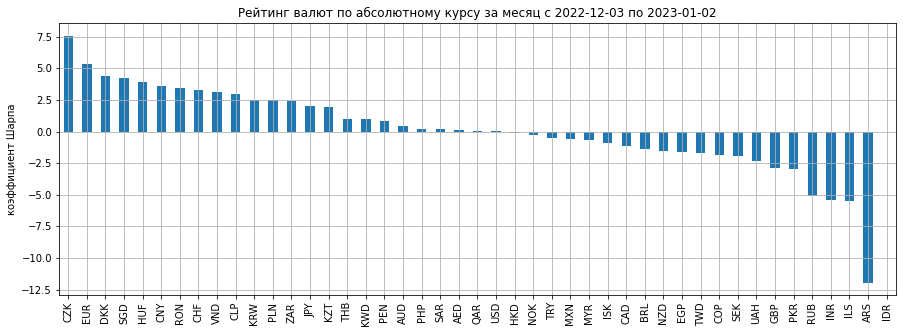

,коэф.Шарпа,Расшифровка,Ссылка на Wikipedia
CZK,7.598459,Чешская крона,Wikipedia link
EUR,5.386878,Евро,Wikipedia link
DKK,4.395666,Датская крона,Wikipedia link
...,...,...,...
ILS,-5.483323,Новый израильский шекель,Wikipedia link
ARS,-11.956672,Аргентинское песо,Wikipedia link
IDR,-inf,Индонезийская рупия,Wikipedia link


In [2]:
rep(31,"месяц")

# За квартал

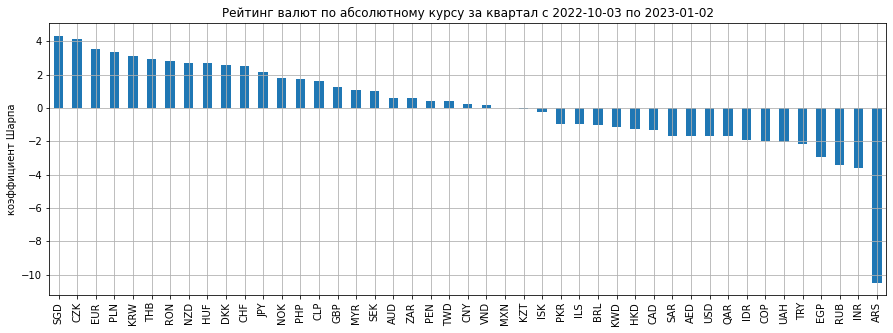

,коэф.Шарпа,Расшифровка,Ссылка на Wikipedia
SGD,4.345914,Сингапурский доллар,Wikipedia link
CZK,4.154441,Чешская крона,Wikipedia link
EUR,3.521472,Евро,Wikipedia link
...,...,...,...
RUB,-3.386283,Российский рубль,Wikipedia link
INR,-3.602259,Индийская рупия,Wikipedia link
ARS,-10.473731,Аргентинское песо,Wikipedia link


In [3]:
rep(92,"квартал")

# За полгода

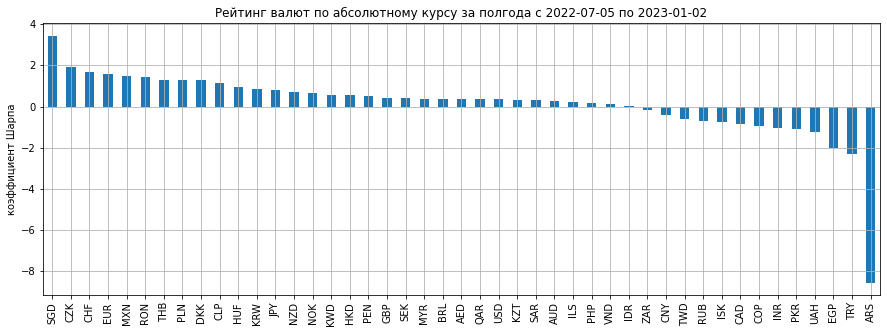

,коэф.Шарпа,Расшифровка,Ссылка на Wikipedia
SGD,3.449090,Сингапурский доллар,Wikipedia link
CZK,1.930412,Чешская крона,Wikipedia link
CHF,1.658262,Швейцарский франк,Wikipedia link
...,...,...,...
EGP,-2.006741,Египетский фунт,Wikipedia link
TRY,-2.296655,Турецкая лира,Wikipedia link
ARS,-8.547308,Аргентинское песо,Wikipedia link


In [4]:
rep(182,"полгода")

# За год

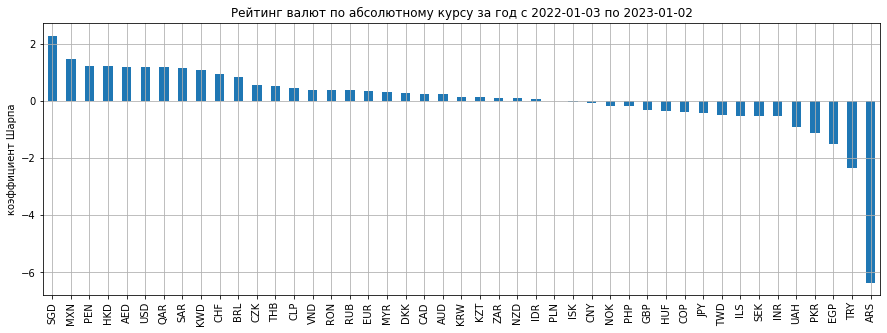

,коэф.Шарпа,Расшифровка,Ссылка на Wikipedia
SGD,2.306620,Сингапурский доллар,Wikipedia link
MXN,1.484709,Мексиканское песо,Wikipedia link
PEN,1.234791,Перуанский новый соль,Wikipedia link
...,...,...,...
EGP,-1.480615,Египетский фунт,Wikipedia link
TRY,-2.328436,Турецкая лира,Wikipedia link
ARS,-6.358720,Аргентинское песо,Wikipedia link


In [5]:
rep(1*365,"год")

# За 2 года

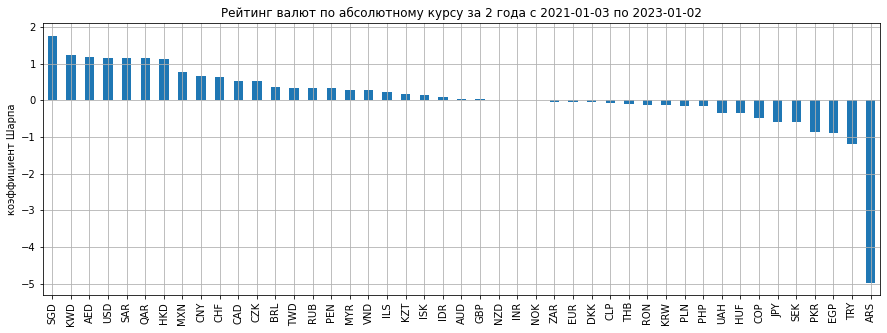

,коэф.Шарпа,Расшифровка,Ссылка на Wikipedia
SGD,1.761619,Сингапурский доллар,Wikipedia link
KWD,1.242920,Кувейтский динар,Wikipedia link
AED,1.165349,Дирхам ОАЭ,Wikipedia link
...,...,...,...
EGP,-0.889848,Египетский фунт,Wikipedia link
TRY,-1.204306,Турецкая лира,Wikipedia link
ARS,-4.975435,Аргентинское песо,Wikipedia link


In [6]:
rep(2*365,"2 года")

# За 3 года

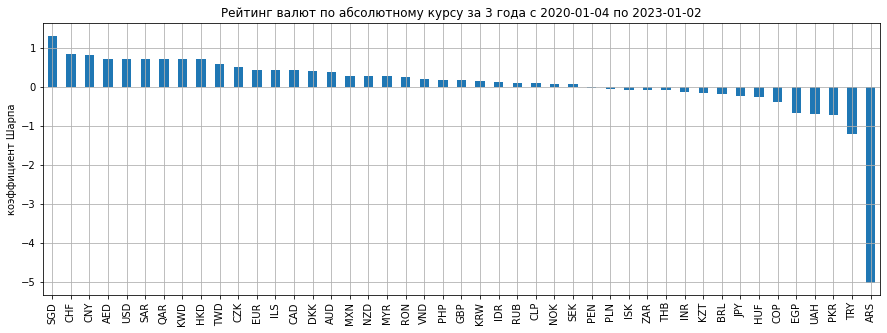

,коэф.Шарпа,Расшифровка,Ссылка на Wikipedia
SGD,1.315405,Сингапурский доллар,Wikipedia link
CHF,0.853250,Швейцарский франк,Wikipedia link
CNY,0.805490,Китайский юань,Wikipedia link
...,...,...,...
PKR,-0.726102,Пакистанская рупия,Wikipedia link
TRY,-1.222729,Турецкая лира,Wikipedia link
ARS,-5.028881,Аргентинское песо,Wikipedia link


In [7]:
rep(3*365,"3 года")

# За 5 лет

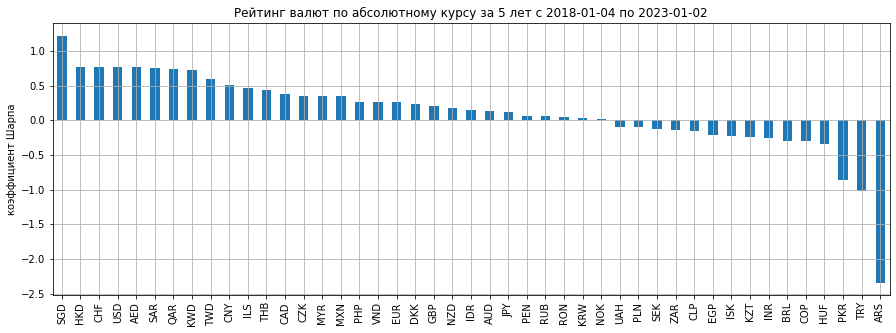

,коэф.Шарпа,Расшифровка,Ссылка на Wikipedia
SGD,1.224821,Сингапурский доллар,Wikipedia link
HKD,0.777823,Гонконгский доллар,Wikipedia link
CHF,0.773976,Швейцарский франк,Wikipedia link
...,...,...,...
PKR,-0.862886,Пакистанская рупия,Wikipedia link
TRY,-1.015629,Турецкая лира,Wikipedia link
ARS,-2.342184,Аргентинское песо,Wikipedia link


In [8]:
rep(5*365,"5 лет")